# Logistic Regression

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# Classification with Logistic Regression
## Scenario
* Assume that you are working for a telecommunications company which is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is more likely to leave the company.
## Load the Telco Churn data
* Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.
## About the dataset
* We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

* This data set provides you information about customer preferences, services opted, personal details, etc. which helps you predict customer churn.

# Load Data from DataFrame from Url

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


# Data Preprocessing
* For this lab, we can use a subset of the fields available to develop out model. Let us assume that the fields we use are 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip' and of course 'churn'.

In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0


#### For modeling the input fields X and the target field y need to be fixed. Since that the target to be predicted is 'churn', the data under this field will be stored under the variable 'y'. We may use any combination or all of the remaining fields as the input. Store these values in the variable 'X'.

In [5]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]  #print the first 5 values

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [6]:
y = np.asarray(churn_df['churn'])
y[0:5] #print the first 5 values

array([1, 1, 0, 0, 0])

#### It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. We may make use of StandardScalar function in the Scikit-Learn library.

In [9]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

# Splitting the dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

# Logistic Regression Classifier modeling

In [11]:
LR = LogisticRegression().fit(X_train,y_train)

In [12]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [13]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

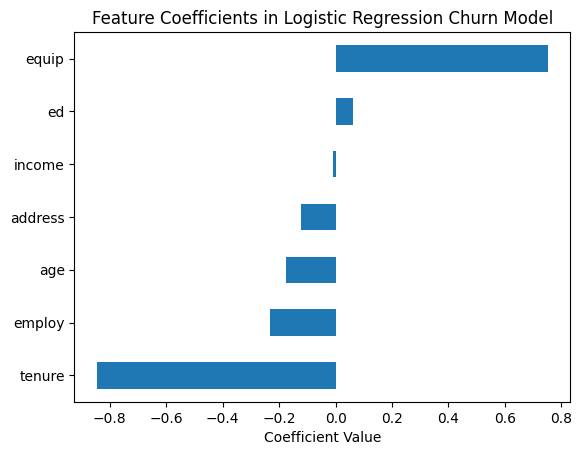

In [14]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

# Performance Evaluation

#### Once the predictions have been generated, it becomes prudent to evaluate the performance of the model in predicting the target variable. Let us evaluate the log-loss value.

## log loss
* Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.

In [15]:
log_loss(y_test, yhat_prob)

0.6257718410257235

tes

In [18]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
df1 = pd.read_csv(url)

df1.sample(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
83,10.0,33.0,2.0,66.0,3.0,9.0,0.0,1.0,0.0,7.10,...,0.0,1.0,0.0,0.0,0.0,1.960,3.056,4.190,1.0,1.0
110,56.0,42.0,10.0,24.0,2.0,5.0,0.0,0.0,0.0,33.65,...,0.0,0.0,1.0,1.0,0.0,3.516,3.240,3.178,3.0,0.0
11,47.0,40.0,16.0,127.0,4.0,12.0,1.0,1.0,0.0,19.70,...,0.0,1.0,0.0,0.0,1.0,2.981,3.240,4.844,2.0,0.0
21,13.0,54.0,2.0,31.0,4.0,2.0,0.0,0.0,0.0,5.85,...,0.0,1.0,0.0,0.0,1.0,1.766,3.240,3.434,1.0,0.0
62,70.0,55.0,12.0,65.0,3.0,24.0,0.0,1.0,0.0,26.70,...,0.0,0.0,1.0,1.0,0.0,3.285,3.755,4.174,3.0,0.0


In [19]:
df1 = df1[['tenure', 'age', 'address', 'income', 'callcard', 'ed', 'employ', 'equip', 'churn']]
df1['churn'] = df1['churn'].astype('int')
df1.head()

,tenure,age,address,income,callcard,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,1.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,0.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,0.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,1.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,1.0,2.0,15.0,0.0,0


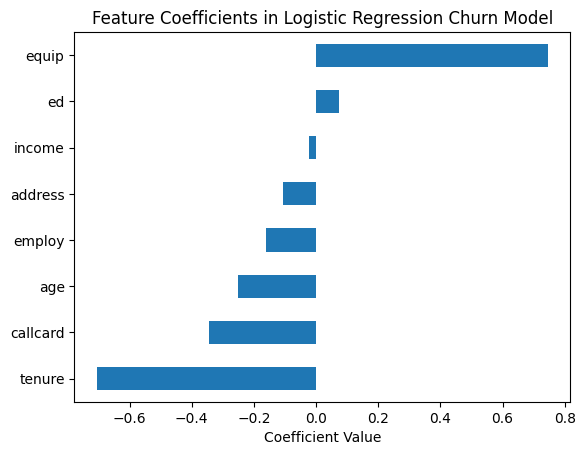

In [24]:
X = np.asarray(df1[['tenure', 'age', 'address', 'income', 'callcard', 'ed', 'employ', 'equip']])
y = np.asarray(df1['churn'])
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)
LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
coefficients = pd.Series(LR.coef_[0], index=df1.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [25]:
log_loss(y_test, yhat_prob)

0.6039104035600186

# Solution 3

In [26]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
df2 = pd.read_csv(url)

df2.sample(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
111,5.0,47.0,7.0,46.0,1.0,6.0,0.0,1.0,0.0,2.95,...,0.0,0.0,0.0,0.0,0.0,1.082,3.240,3.829,1.0,1.0
54,1.0,21.0,1.0,18.0,3.0,0.0,1.0,0.0,0.0,2.70,...,0.0,1.0,0.0,1.0,1.0,0.993,3.240,2.890,1.0,1.0
106,19.0,26.0,2.0,48.0,3.0,0.0,0.0,1.0,0.0,7.55,...,0.0,0.0,1.0,0.0,0.0,2.022,3.240,3.871,3.0,0.0
167,7.0,38.0,4.0,70.0,4.0,4.0,1.0,1.0,1.0,3.85,...,1.0,1.0,1.0,0.0,1.0,1.348,2.958,4.248,4.0,1.0
180,56.0,53.0,23.0,100.0,5.0,14.0,1.0,1.0,0.0,14.15,...,0.0,1.0,0.0,0.0,1.0,2.650,3.240,4.605,2.0,0.0


In [28]:
df2 = df2[['tenure', 'age', 'address', 'income', 'callcard', 'wireless',  'ed', 'employ', 'equip', 'churn']]
df2['churn'] = df2['churn'].astype('int')
df2.head()

,tenure,age,address,income,callcard,wireless,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,1.0,1.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,0.0,0.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,0.0,0.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,1.0,1.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,1.0,0.0,2.0,15.0,0.0,0


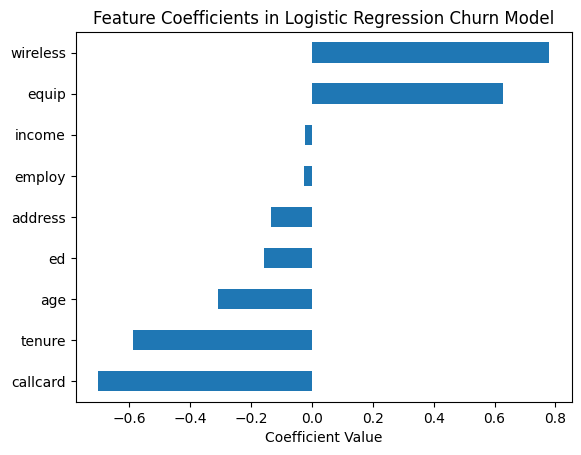

In [29]:
X = np.asarray(df2[['tenure', 'age', 'address', 'income', 'callcard', 'wireless', 'ed', 'employ', 'equip']])
y = np.asarray(df2['churn'])
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)
LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
coefficients = pd.Series(LR.coef_[0], index=df2.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [30]:
log_loss(y_test, yhat_prob)

0.7760557225417113